# Wine Cluster Analysis: Insights from PCA and KMeans with Hierarchical Models

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA

### Configuration for Enhanced Data Display and Numeric Formatting

In [41]:
# display all columns 
pd.options.display.max_columns = None

# display all rows 
pd.options.display.max_rows = None

# convert the 'exponential' values to float
np.set_printoptions(suppress=True)

##pd.options.display.float_format ='{:.6f}'.format

### Reading Data

In [42]:
df_wine=pd.read_csv(r"C:\Users\sm983\Desktop\Machine Learning Projects\K-means with PCA\Wine.csv")
print(df_wine.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [43]:
df_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [44]:
df_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [45]:
df_wine.shape

(178, 14)

### Checking Missing Values

In [46]:
Total = df_wine.isnull().sum().sort_values(ascending = False) 
Percent = (df_wine.isnull().sum()*100/df_wine.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data['Type'] = df_wine[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
Alcohol,0,0.0,float64
Malic_Acid,0,0.0,float64
Ash,0,0.0,float64
Ash_Alcanity,0,0.0,float64
Magnesium,0,0.0,int64
Total_Phenols,0,0.0,float64
Flavanoids,0,0.0,float64
Nonflavanoid_Phenols,0,0.0,float64
Proanthocyanins,0,0.0,float64
Color_Intensity,0,0.0,float64


### Checking Outliers

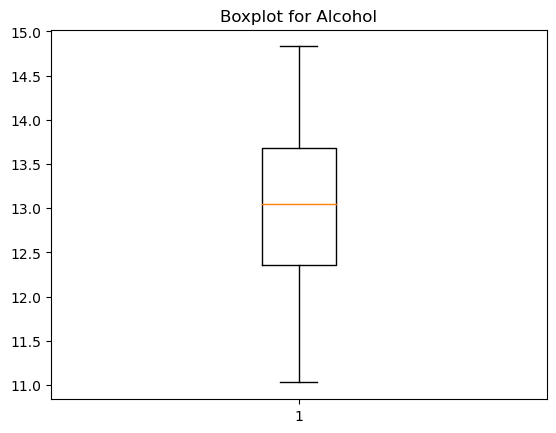

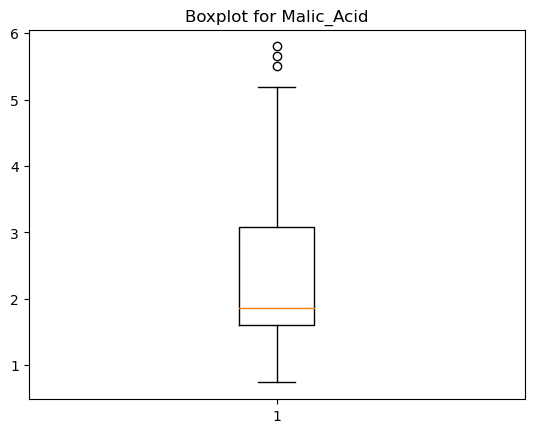

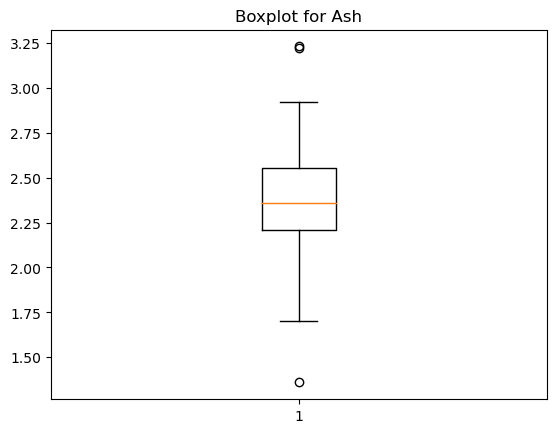

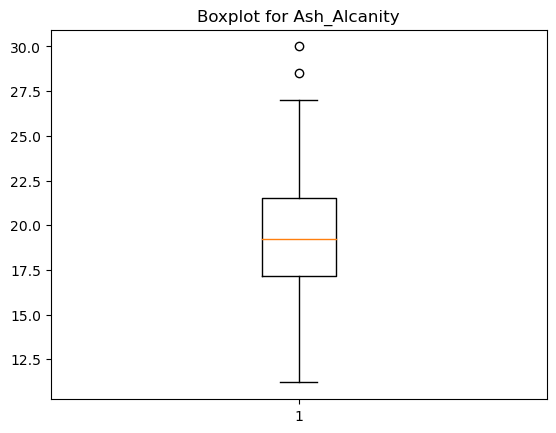

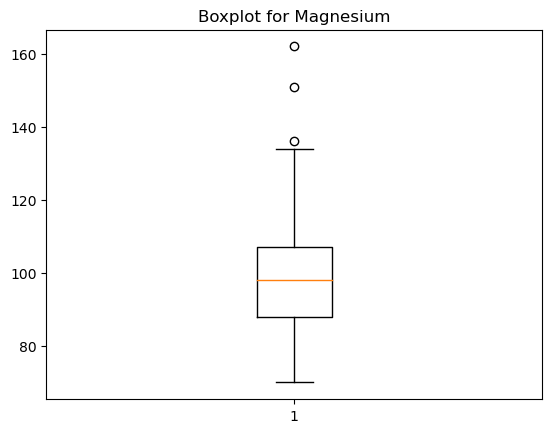

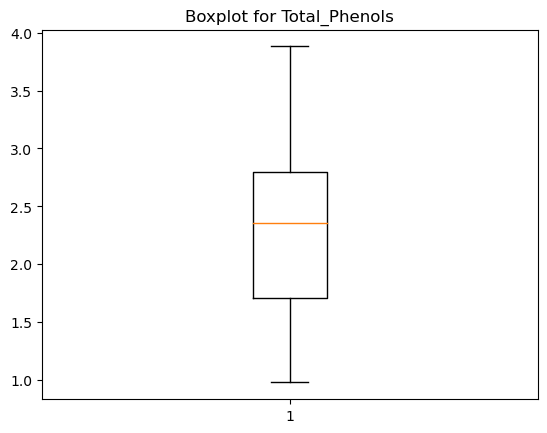

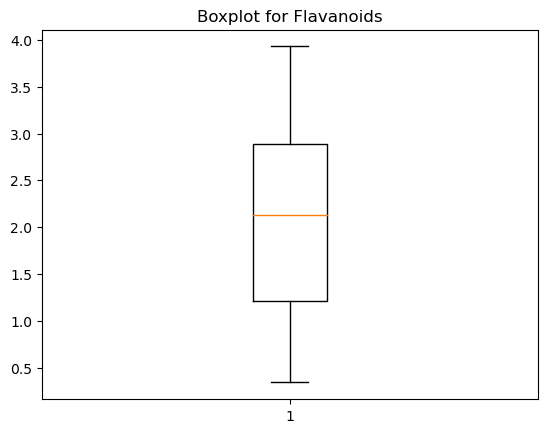

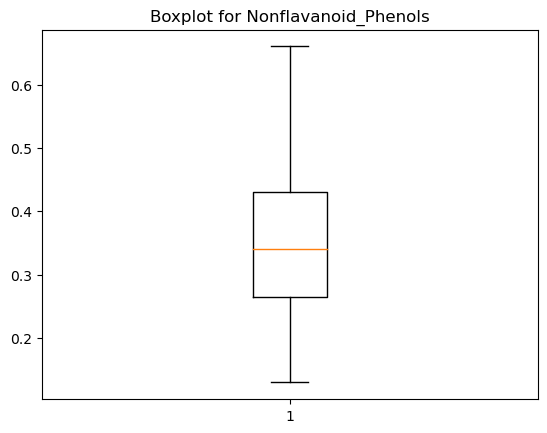

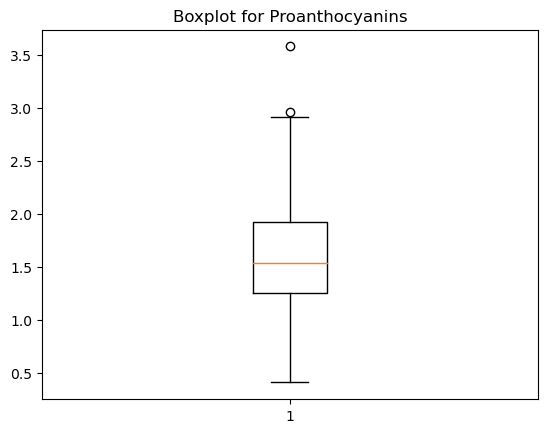

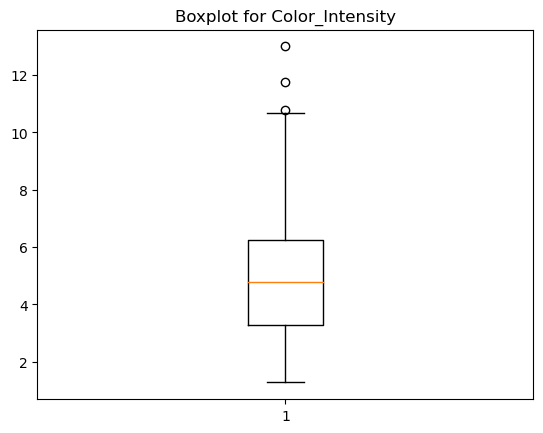

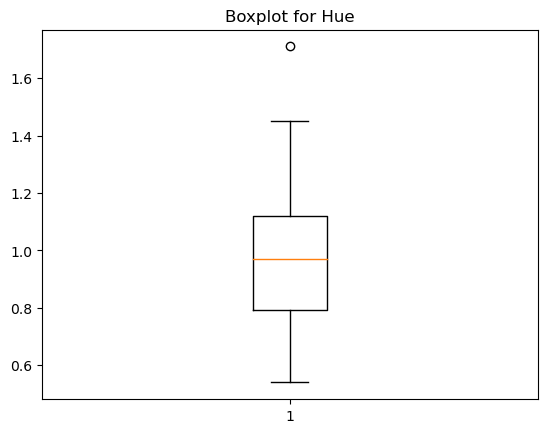

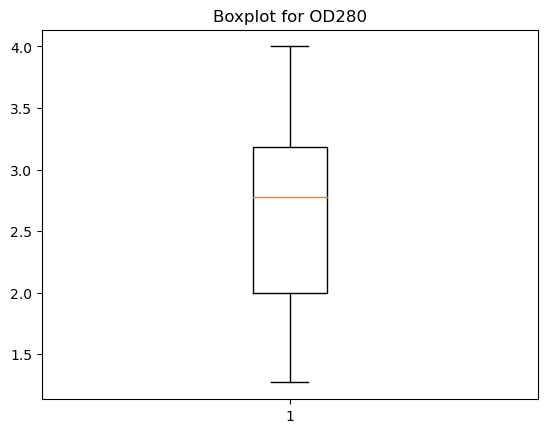

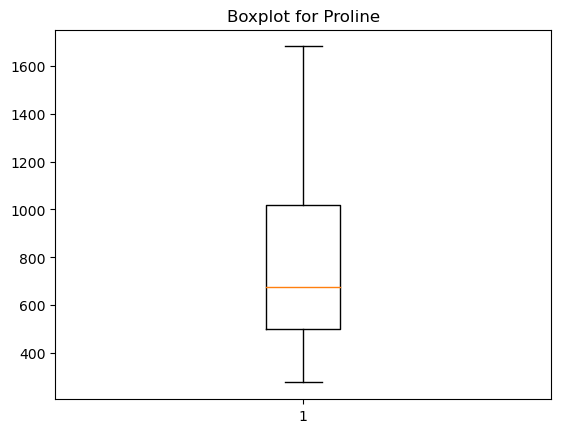

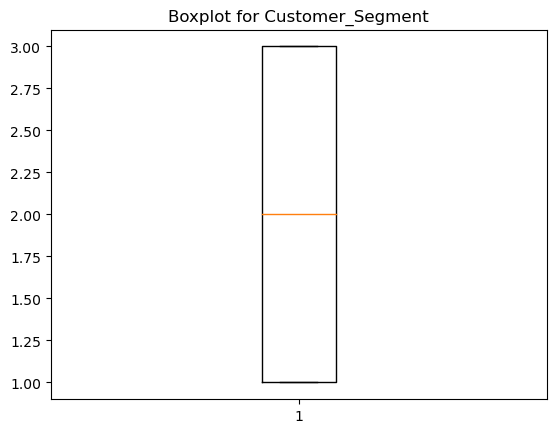

In [49]:
import matplotlib.pyplot as plt

columns_to_check = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline','Customer_Segment']

for column in columns_to_check:
    # Plot boxplot
    plt.boxplot(df_wine[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

    # Calculate quartiles and IQR
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filtering the DataFrame based on the IQR
    df_wine = df_wine[(df_wine[column] >= Q1 - 1.5 * IQR) & (df_wine[column] <= Q3 + 1.5 * IQR)].reset_index(drop=True)


In [50]:
df_wine.shape

(161, 14)

## PCA (Principal Component Analysis) for dimensionality reduction

In [51]:
df_numeric_features = df_wine.select_dtypes(include=[np.number])
df_num = df_numeric_features.drop('Customer_Segment',axis=1)       
df_num.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[ 1.51516332 -0.57916566  0.27093638 ...  0.3833328   1.82809675
   0.98217445]
 [ 0.20964771 -0.51250719 -0.93153695 ...  0.42947949  1.09692792
   0.93483012]
 [ 0.15894808  0.03980581  1.26608672 ...  0.33718612  0.77352632
   1.36092915]
 ...
 [ 0.29837208  1.8681523  -0.43396178 ... -1.69326819 -1.49028487
   0.25622795]
 [ 0.17162299  0.25882648  0.02214879 ... -1.6471215  -1.40591924
   0.27200939]
 [ 1.38841423  1.69674482  1.5563389  ... -1.60097481 -1.43404112
  -0.61175157]]


In [53]:
df_num_std.shape

(161, 13)

In [54]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(df_num_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
#printinf top5 values of principal componenets
print(cov_mat[0:5])

[[ 1.00625     0.09725538  0.22675131 -0.34054958  0.42386531  0.3276344
   0.30444773 -0.17637052  0.21680952  0.54423566 -0.01054545  0.10919042
   0.6565025 ]
 [ 0.09725538  1.00625     0.18486372  0.31296748  0.03033462 -0.37176456
  -0.46313905  0.30151427 -0.24350547  0.30609278 -0.58609384 -0.40202172
  -0.1832277 ]
 [ 0.22675131  0.18486372  1.00625     0.32269493  0.42375013  0.10670534
   0.04414894  0.09115183  0.03123726  0.21217724 -0.04343525 -0.03310184
   0.2735448 ]
 [-0.34054958  0.31296748  0.32269493  1.00625    -0.17800729 -0.45588719
  -0.51060447  0.34252935 -0.30999345 -0.03191613 -0.3204318  -0.37802518
  -0.47538171]
 [ 0.42386531  0.03033462  0.42375013 -0.17800729  1.00625     0.24094267
   0.20043099 -0.23730878  0.10023165  0.34906976 -0.02178624  0.02154006
   0.45240865]]


In [55]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

#these eigen values and eigenvectors of 35 componenets 

Eigenvalues: 
 
 [5.04313617 2.70251793 1.24420301 0.91340121 0.74614924 0.56313075
 0.07548675 0.46316555 0.17377599 0.34675615 0.31297127 0.2339036
 0.26265236] 

Eigenvectors: 
 
 [[ 0.17161178 -0.4486929  -0.18081562 -0.0234822   0.22772023 -0.15633971
   0.04562935 -0.43723874 -0.20961996  0.28631789 -0.42553294 -0.3392605
   0.21053644]
 [-0.23752985 -0.25097967  0.07026231  0.54091995  0.05486988 -0.63693141
  -0.04322724  0.02829994  0.0378083   0.17068591  0.12427279  0.21468015
  -0.2821371 ]
 [ 0.01057842 -0.31079489  0.70464382 -0.14274413  0.09558633 -0.02402838
   0.02773113 -0.05002101  0.05627274 -0.23156098  0.27947793 -0.46967222
  -0.13387903]
 [-0.27482858  0.03911351  0.55185965  0.16633094  0.0076764   0.35546897
  -0.05743633 -0.34052978 -0.08047051  0.19232197 -0.29325105  0.44275117
   0.13985611]
 [ 0.12570021 -0.39482154  0.18359623 -0.27606225 -0.55366648 -0.14311143
  -0.01546726  0.47276113  0.02663393  0.21916122 -0.2339087   0.16897519
   0.18873472]
 [ 

In [56]:
# create a list of eigenvalues
eig_val = list(eig_val)
eig_val.sort(reverse = True)
print(eig_val)

[5.043136172127925, 2.7025179345080472, 1.2442030093485945, 0.9134012145517343, 0.7461492397080631, 0.5631307469660938, 0.46316555478331206, 0.34675614802475313, 0.31297127482055576, 0.26265236478264115, 0.23390360100986207, 0.17377599261696422, 0.07548674675145892]


### Elbow Plot

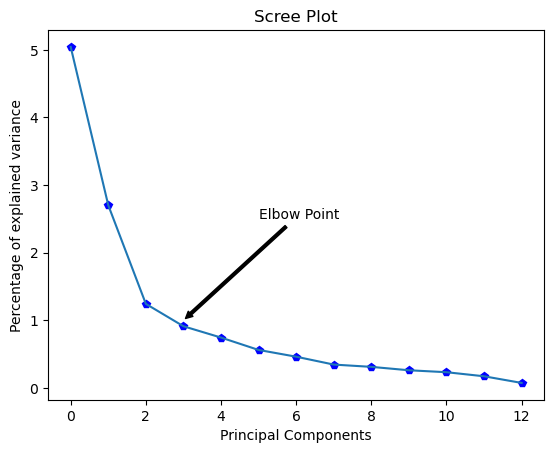

In [57]:
plt.plot(eig_val,'bp')            
plt.plot(eig_val) 
plt.xlabel('Principal Components')    
plt.ylabel('Percentage of explained variance')  
plt.annotate(text ='Elbow Point', xy=(3,1), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))
plt.title('Scree Plot')
plt.show()   

In [58]:
#we consider all the principle components until this elbow point
#we have filtered eigen vectors of top5 components
#Principle components are genrated based on eigen vectors of selected eigen values
#as we selected to go with top 5 eigen values now we will fetch there coresponding eigen vec and create final principle components
#[:,0:5]-feteches all rows only top 5 cols(fetch first 5 eigen vectors with all rows)
eigenvector = eig_vec[:,0:3]

eigenvector

array([[ 0.17161178, -0.4486929 , -0.18081562],
       [-0.23752985, -0.25097967,  0.07026231],
       [ 0.01057842, -0.31079489,  0.70464382],
       [-0.27482858,  0.03911351,  0.55185965],
       [ 0.12570021, -0.39482154,  0.18359623],
       [ 0.39126654, -0.03328129,  0.09807092],
       [ 0.42377451,  0.03043168,  0.07288013],
       [-0.29348719, -0.02140495,  0.05422099],
       [ 0.32425906,  0.00136401,  0.09137648],
       [-0.06495018, -0.50807388, -0.2347088 ],
       [ 0.28769489,  0.25921425,  0.14177781],
       [ 0.36242847,  0.18089061,  0.14242605],
       [ 0.28353394, -0.34803769, -0.0767855 ]])

In [59]:
import pandas as pd
# Perform PCA
df_pca = pd.DataFrame(df_num_std.dot(eigenvector), columns=['PC1', 'PC2', 'PC3'])
# Display the top five rows
print(df_pca.head())

        PC1       PC2       PC3
0  3.503528 -1.609446  0.039412
1  2.342642  0.331164 -1.978331
2  2.661349 -0.936183  1.126533
3  3.925301 -2.710827 -0.146296
4  1.032831 -1.074396  2.445841


In [60]:
import pandas as pd
df_pca_wine = pd.concat([ df_wine['Customer_Segment'],df_pca], axis=1)
print(df_pca_wine.head())

   Customer_Segment       PC1       PC2       PC3
0                 1  3.503528 -1.609446  0.039412
1                 1  2.342642  0.331164 -1.978331
2                 1  2.661349 -0.936183  1.126533
3                 1  3.925301 -2.710827 -0.146296
4                 1  1.032831 -1.074396  2.445841


In [61]:
df_pca_wine.corr()

,Customer_Segment,PC1,PC2,PC3
Customer_Segment,1.000000,-9.104725e-01,-1.271456e-02,-4.629925e-02
PC1,-0.910473,1.000000e+00,3.488459e-16,5.318578e-17
PC2,-0.012715,3.488459e-16,1.000000e+00,4.510624e-16
PC3,-0.046299,5.318578e-17,4.510624e-16,1.000000e+00


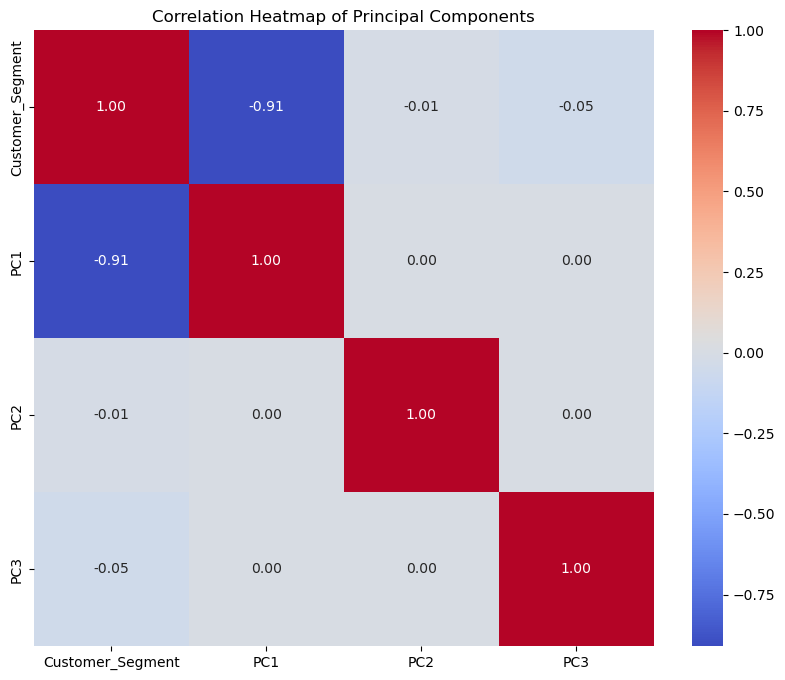

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df_pca_wine.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Principal Components')
plt.show()

In [63]:
df_pca_wine.isnull().sum()

Customer_Segment    0
PC1                 0
PC2                 0
PC3                 0
dtype: int64

## Building K-Means Model

In [64]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4]

for K in n_clusters:
    cluster = KMeans(n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_pca_wine)
    
    score = silhouette_score(df_pca_wine, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {}".format(K, score))  
   

For n_clusters = 2, silhouette score is 0.40640369989099434
For n_clusters = 3, silhouette score is 0.4887695237726945
For n_clusters = 4, silhouette score is 0.43083939792846654


In [66]:
# building a K-Means model for K = 3
model = KMeans(n_clusters= 3, random_state= 10)

# fit the model
model.fit(df_pca_wine) 

KMeans(n_clusters=3, random_state=10)

In [67]:
data_output = df_wine.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_
# head() to display top five rows
data_output.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


In [68]:
np.unique(model.labels_, return_counts=True)       

(array([0, 1, 2]), array([46, 58, 57], dtype=int64))

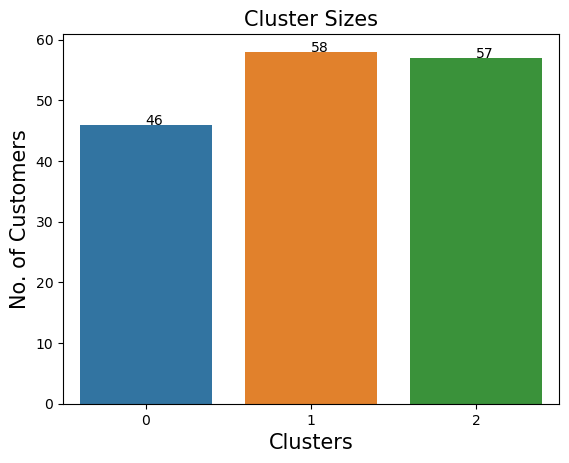

In [70]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

#text:
plt.text(x = 0, y =46, s = np.unique(model.labels_, return_counts=True)[1][0]) 
plt.text(x = 1, y =58, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 2, y =57, s = np.unique(model.labels_, return_counts=True)[1][2])

plt.show()

## Building hirerachial clustering

In [71]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram,linkage

In [73]:
z=sch.linkage(df_pca_wine,method='ward')
z

array([[ 32.        ,  34.        ,   0.06097706,   2.        ],
       [106.        , 116.        ,   0.13560628,   2.        ],
       [123.        , 125.        ,   0.18887279,   2.        ],
       [119.        , 130.        ,   0.19940201,   2.        ],
       [ 14.        ,  51.        ,   0.21774012,   2.        ],
       [ 19.        ,  40.        ,   0.22399649,   2.        ],
       [ 18.        ,  46.        ,   0.23398483,   2.        ],
       [ 99.        , 110.        ,   0.258397  ,   2.        ],
       [ 47.        ,  54.        ,   0.29493218,   2.        ],
       [132.        , 147.        ,   0.30455848,   2.        ],
       [  0.        ,  56.        ,   0.30763906,   2.        ],
       [ 70.        ,  94.        ,   0.31454426,   2.        ],
       [  7.        , 165.        ,   0.31515623,   3.        ],
       [ 87.        ,  88.        ,   0.32046007,   2.        ],
       [  9.        ,  45.        ,   0.32082046,   2.        ],
       [137.        , 150

## Dendogram

Text(0.5, 1.0, 'Hierarchical Clustering')

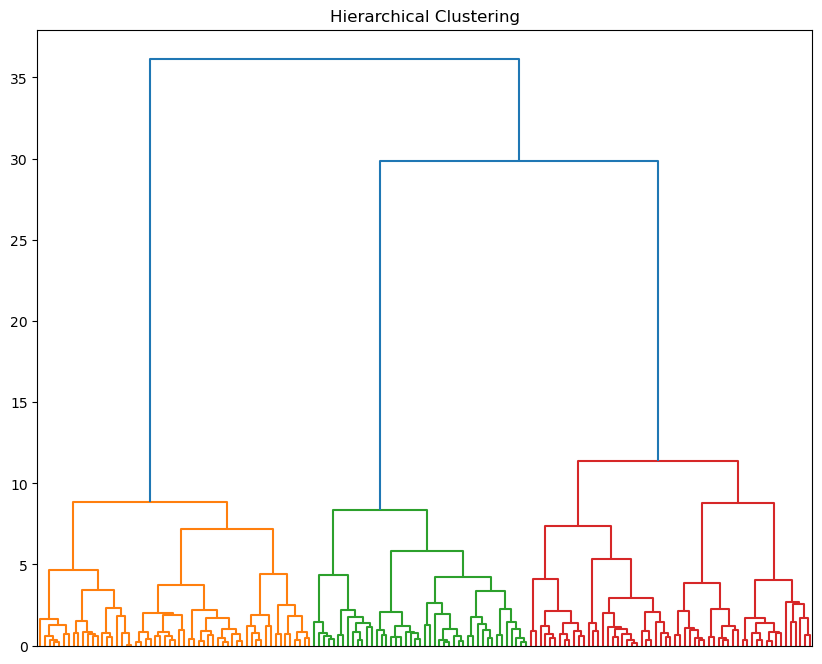

In [74]:
plt.figure(figsize=(10,8))
den=sch.dendrogram(z)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.title('Hierarchical Clustering')

In [75]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
hc_model=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')

In [88]:
y_clusters=hc_model.fit_predict(df_pca_wine)

In [89]:
data_clustered=df_pca_wine.copy()

In [90]:
data_clustered['Cluster_hirerachial']=y_clusters.astype('object')

In [91]:
data_clustered.head()

,Customer_Segment,PC1,PC2,PC3,Cluster_hirerachial
0,1,3.503528,-1.609446,0.039412,1
1,1,2.342642,0.331164,-1.978331,1
2,1,2.661349,-0.936183,1.126533,1
3,1,3.925301,-2.710827,-0.146296,1
4,1,1.032831,-1.074396,2.445841,1


In [92]:
cols=list(data_clustered.columns)

In [93]:
cols

['Customer_Segment', 'PC1', 'PC2', 'PC3', 'Cluster_hirerachial']

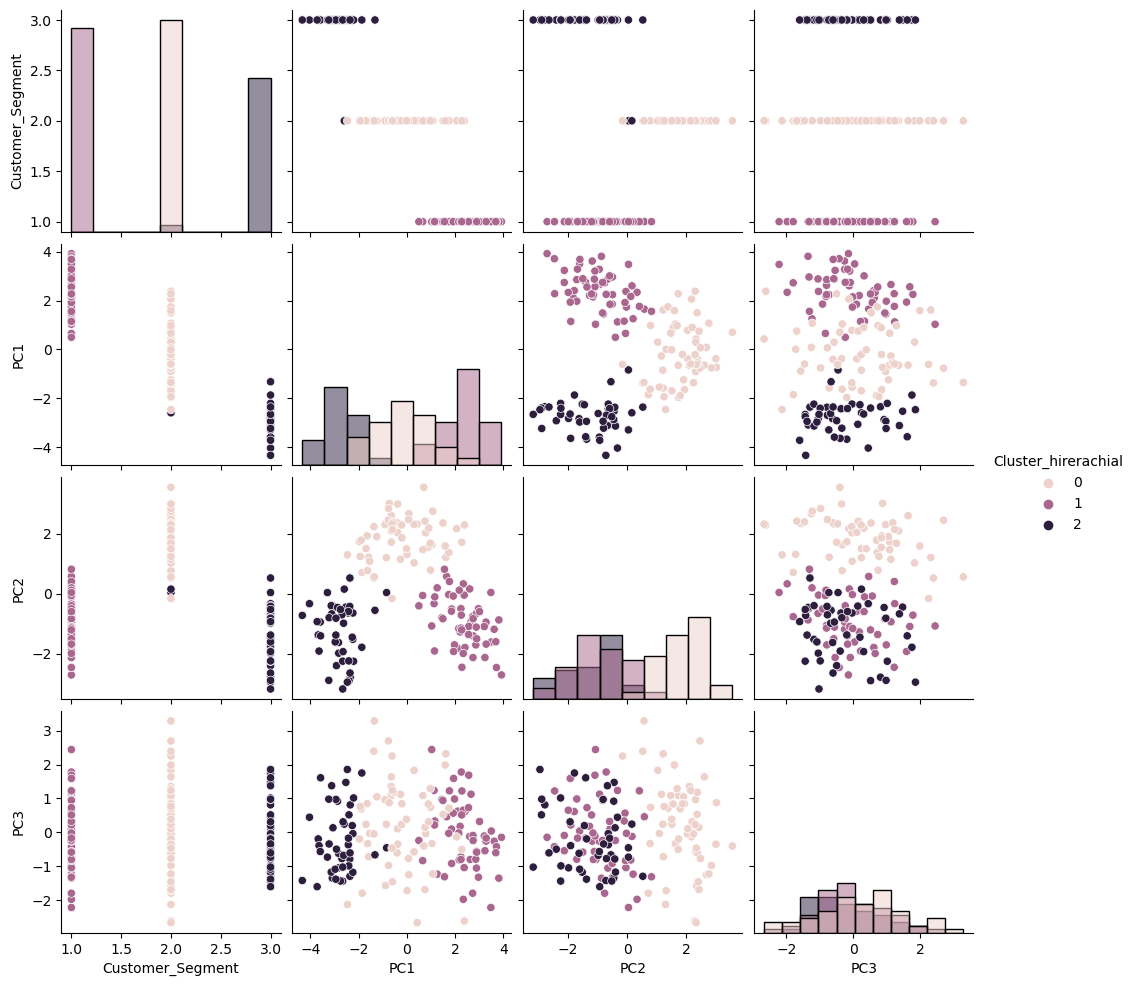

In [94]:
sns.pairplot(data_clustered, hue="Cluster_hirerachial",diag_kind='hist')

In [95]:
data_clustered['Cluster_hirerachial'].value_counts()

Cluster_hirerachial
0    59
1    57
2    45
Name: count, dtype: int64

In [97]:
result=data_clustered.copy()

In [98]:
result.replace({'Cluster_hirerachial' : 0} , 'cust_seg1' , inplace=True)
result.replace({'Cluster_hirerachial' : 1} , 'cust_seg2' , inplace= True)
result.replace({'Cluster_hirerachial' : 2} , 'cust_seg3' , inplace= True)

In [99]:
result.head()

,Customer_Segment,PC1,PC2,PC3,Cluster_hirerachial
0,1,3.503528,-1.609446,0.039412,cust_seg2
1,1,2.342642,0.331164,-1.978331,cust_seg2
2,1,2.661349,-0.936183,1.126533,cust_seg2
3,1,3.925301,-2.710827,-0.146296,cust_seg2
4,1,1.032831,-1.074396,2.445841,cust_seg2


## Conclusion

Through the application of PCA (Principal Component Analysis) for dimensionality reduction and subsequent clustering using KMeans and Hierarchical techniques, we have effectively segmented wine samples into three distinct clusters based on their chemical composition. The clusters reveal meaningful patterns within the data, offering insights into the underlying structure of the wine dataset. KMeans and Hierarchical clustering methods provided consistent results, indicating robustness in cluster formation. Further analysis and interpretation of these clusters can potentially aid in understanding wine characteristics and inform decision-making processes in the wine industry, such as product marketing and quality assessment.